# Regularized logistic regression

## Binary classification problem $y\in {0,1}$

### J cost function

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m [-y^{(i)} \log (h_{\theta}(x^{(i)}))-(1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]+ \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2 $$

* * *
### The gradient of the cost
\begin{align}
\frac{\partial}{\partial \theta_j}J(\theta) & = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})\cdot x_j^{(i)} \text{ for } j=0 \\
\frac{\partial}{\partial \theta_j}J(\theta) & = (\frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})\cdot x_j^{(i)})+ \frac{\lambda}{m}\theta_j \text{ for } j \geq 1
\end{align}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

original_X, original_y = make_moons(n_samples = 200, noise=0.05, random_state=0)

## Visualizing the data

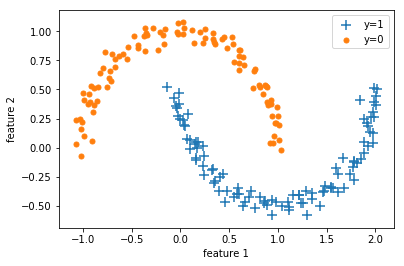

In [3]:
plt.scatter(original_X[original_y==1][:,0], original_X[original_y==1][:,1], marker='+', label='y=1', s=100)
plt.scatter(original_X[original_y==0][:,0], original_X[original_y==0][:,1], marker='.', label='y=0', s=100)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

In [4]:
def mapFeature(X1, X2, degree=8):
    X1=X1.reshape(-1,1)
    X2=X2.reshape(-1,1)
    out = np.ones_like(X1)
    
    for i in range(1, degree+1):
        for j in range(0, i+1):
            out = np.hstack((out, (X1**(i-j)) * (X2** j)))
    return out

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

def compute_cost(X_values, y_values, theta, lambda_value):
    m = len(X_values)
    h = sigmoid(X_values.dot(theta))
    
    y1 = y_values[y_values==1]
    y0 = y_values[y_values==0]
    h1 = h[y_values==1]
    h0 = h[y_values==0]
        
    cost1 = -1*y1.T.dot(np.log(h1))
    cost0 = -((1-y0).T).dot(np.log(1-h0))    
    cost = (cost1+cost0)/m
    newtheta = np.copy(theta)
    newtheta[0]=0
    cost = cost +  lambda_value* (newtheta.T.dot(newtheta))/(2*m)
    grad = X_values.T.dot(h-y_values)/m
    grad = grad + lambda_value* newtheta/m
    return cost, grad

def compute_cost_backup(X_values, y_values, theta, lambda_value):
    m = len(X_values)
    h = sigmoid(X_values.dot(theta))
    cost1 = -1*y_values.T.dot(np.log(h))
    cost0 = -((1-y_values).T).dot(np.log(1-h))    
    cost = (cost1+cost0)/m
    #cost0 could be NaN..    
    newtheta = np.copy(theta)
    newtheta[0]=0
    cost = cost +  lambda_value* (newtheta.T.dot(newtheta))/(2*m)
    grad = X_values.T.dot(h-y_values)/m
    grad = grad + lambda_value* newtheta/m
    return cost, grad

In [6]:
X = mapFeature(original_X[:,0], original_X[:,1])
y = original_y.reshape(-1,1)
initial_theta = np.zeros((X.shape[1],1))
Lambda = 1

In [7]:
cost, grad = compute_cost(X, y, initial_theta, Lambda)
print(cost)
grad[0:5]

[[ 0.69314718]]


array([[ 0.        ],
       [-0.25083155],
       [ 0.19049214],
       [-0.25009565],
       [ 0.03144349]])

In [8]:
import scipy.optimize as opt

In [9]:
def costFunction(theta, X_values, y_values, lambda_value):
    theta = theta.reshape(-1, 1)
    cost, grad = compute_cost(X_values, y_values, theta, lambda_value)
    return cost

def gradFunction(theta, X_values, y_values, lambda_value):
    theta = theta.reshape(-1, 1)
    cost, grad = compute_cost(X_values, y_values, theta, lambda_value)
    grad = grad.reshape(-1)
    return grad

In [10]:
initial_theta.shape

(45, 1)

In [11]:
Result = opt.minimize(fun = costFunction, x0 = initial_theta, args = (X, y, 1), method = 'BFGS', jac = gradFunction, options={'maxiter': 400, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.113606
         Iterations: 72
         Function evaluations: 75
         Gradient evaluations: 75


In [12]:
Result.x

array([ 2.36335043,  0.28617667, -2.18000379, -2.19753758, -0.63852643,
       -0.88230323, -0.08893285, -1.46307422,  0.25752527, -1.1223348 ,
       -1.58998353, -0.50852388, -0.30465723, -0.09158885, -0.76058731,
        0.07084519, -1.02300952,  0.21359501, -0.42415674,  0.06901775,
       -0.71692088, -0.89113676, -0.47260113, -0.06265974, -0.08210183,
       -0.17334651, -0.00893914, -0.57385869,  0.69143089, -0.79586347,
        0.22957426, -0.24046586,  0.05315399, -0.1783278 ,  0.02279621,
       -0.51250543,  0.36115717, -0.37745788,  0.09518659, -0.08028836,
       -0.04734855, -0.01379521, -0.1065424 ,  0.00351779, -0.4397057 ])

In [13]:
def predict_with_one(X_values, theta):
    return sigmoid(X_values.dot(theta))>=0.5

In [14]:
X.shape

(200, 45)

In [15]:
Result.x.shape

(45,)

In [16]:
p = predict_with_one(X, Result.x.reshape(-1,1))
predict_right = np.equal(p.reshape(-1,1), y.reshape(-1,1))
print('Train Accuracy: %f\n'%(np.mean(predict_right)*100));

Train Accuracy: 100.000000



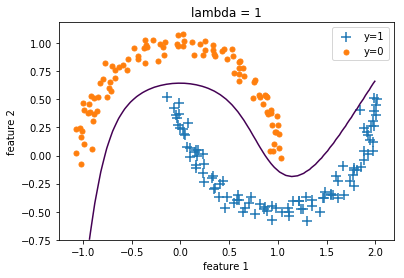

In [17]:
plt.scatter(original_X[original_y==1][:,0], original_X[original_y==1][:,1], marker='+', label='y=1', s=100)
plt.scatter(original_X[original_y==0][:,0], original_X[original_y==0][:,1], marker='.', label='y=0', s=100)
plt.legend()
plt.title('lambda = {0}'.format(Lambda))
# Here is the grid range
u = np.linspace(-1, 2, 50)
v = np.linspace(-0.75, 1, 50)

# Evaluate z = theta*x over the grid
z = np.zeros([len(u),len(v)])
#Fill out J_vals
for i, e in enumerate(u):
    for j, e2 in enumerate(v):        
        z[i,j] = mapFeature(e,e2).dot(Result.x.reshape(-1,1))
    
plt.contour(u, v, z.T, 0)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [18]:
def drawDifferentLambda(Lambda=1):
    result = opt.minimize(fun = costFunction, x0 = initial_theta, args = (X, y, Lambda), 
                          method = 'BFGS', jac = gradFunction, options={'maxiter': 400, 'disp': True})

    plt.scatter(original_X[original_y==1][:,0], original_X[original_y==1][:,1], marker='+', label='y=1', s=100)
    plt.scatter(original_X[original_y==0][:,0], original_X[original_y==0][:,1], marker='.', label='y=0', s=100)
    plt.legend()
    plt.title('lambda = {0}'.format(Lambda))
    # Here is the grid range
    u = np.linspace(-1, 2, 50)
    v = np.linspace(-0.75, 1, 50)

    # Evaluate z = theta*x over the grid
    z = np.zeros([len(u),len(v)])
    #Fill out J_vals
    for i, e in enumerate(u):
        for j, e2 in enumerate(v):        
            z[i,j] = mapFeature(e,e2).dot(result.x)
    
    
    plt.contour(u, v, z.T, 0 )
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 73
         Function evaluations: 83
         Gradient evaluations: 83


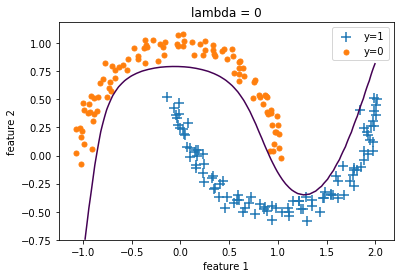

In [19]:
drawDifferentLambda(Lambda=0)

Optimization terminated successfully.
         Current function value: 0.421562
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25


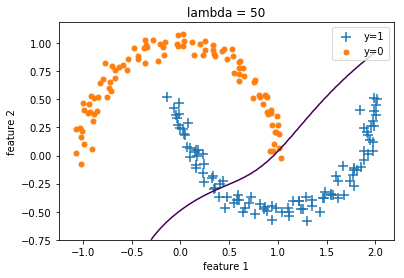

In [20]:
drawDifferentLambda(Lambda=50)

### Check with sklearn.linear_model.LinearRegression

Note that the parameter $C$ is proportional to the inverse of regularization strength $(C\propto 1/\lambda)$

In [21]:
from sklearn import linear_model
logi_reg = linear_model.LogisticRegression(C=1.0)
logi_reg.fit(X, np.ravel(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
logi_reg.score(X, y)

1.0

### We can use PolynomialFeatures provided by sklearn.preprocessing
http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X2 = poly.fit_transform(original_X)

logi_reg = linear_model.LogisticRegression()
logi_reg.fit(X2, np.ravel(y))
logi_reg.score(X2, y)

1.0